<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/sklearn/8_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 규제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['Price'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X_data = housing_df.iloc[:, :-3]
y_data = housing_df.iloc[:, -1]

# 릿지 회귀

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [5]:
# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_data, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-0.522 -0.654 -0.706 -0.64  -0.678]
5 folds의 개별 RMSE scores : [0.723 0.809 0.84  0.8   0.823]
5 folds의 평균 RMSE : 0.799


알파값 변화

In [6]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_data, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
    print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 3))
    print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-0.523 -0.654 -0.706 -0.64  -0.678]
5 folds의 개별 RMSE scores : [0.723 0.809 0.84  0.8   0.823]
5 folds의 평균 RMSE : 0.799
5 folds의 개별 Negative MSE scores : [-0.523 -0.654 -0.706 -0.64  -0.678]
5 folds의 개별 RMSE scores : [0.723 0.809 0.84  0.8   0.823]
5 folds의 평균 RMSE : 0.799
5 folds의 개별 Negative MSE scores : [-0.523 -0.654 -0.706 -0.64  -0.678]
5 folds의 개별 RMSE scores : [0.723 0.809 0.84  0.8   0.823]
5 folds의 평균 RMSE : 0.799
5 folds의 개별 Negative MSE scores : [-0.522 -0.654 -0.706 -0.64  -0.678]
5 folds의 개별 RMSE scores : [0.723 0.809 0.84  0.8   0.823]
5 folds의 평균 RMSE : 0.799
5 folds의 개별 Negative MSE scores : [-0.52  -0.658 -0.707 -0.646 -0.676]
5 folds의 개별 RMSE scores : [0.721 0.811 0.841 0.804 0.822]
5 folds의 평균 RMSE : 0.800


알파값의 변화에 따른 피처의 회귀 계수 값 시각화

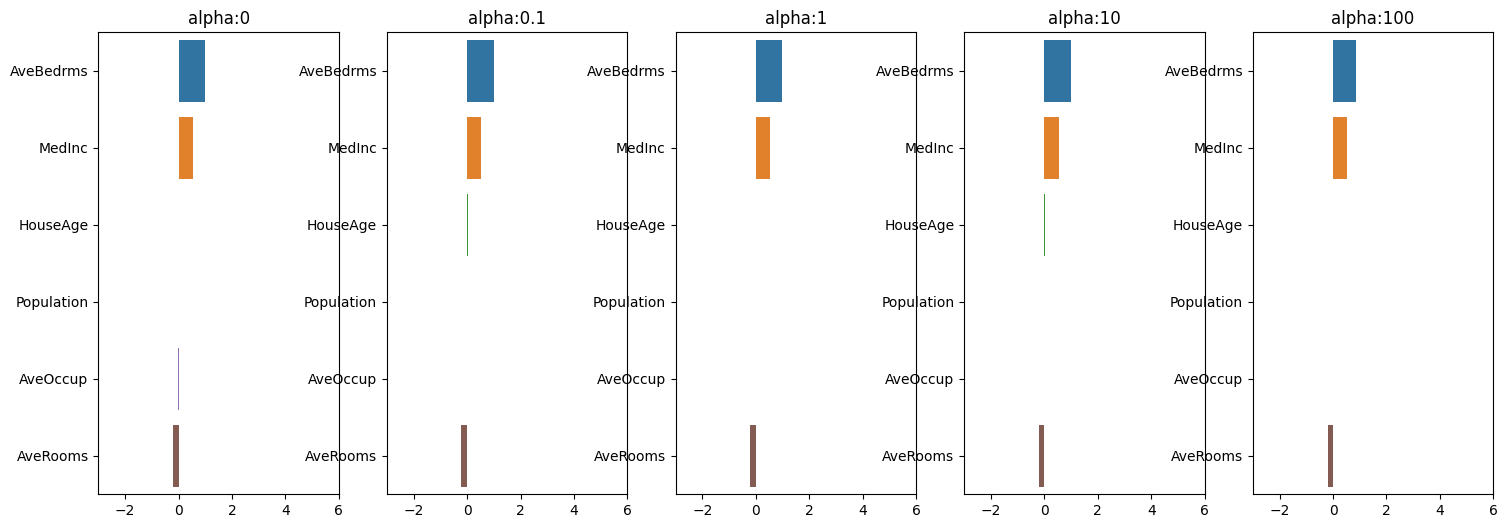

In [7]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_data)

    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [8]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
AveBedrms,0.993730,0.993576,0.992192,0.978555,0.859635
MedInc,0.536910,0.536895,0.536756,0.535391,0.523411
HouseAge,0.016503,0.016504,0.016505,0.016521,0.016659
Population,0.000022,0.000022,0.000022,0.000022,0.000023
AveOccup,-0.004877,-0.004877,-0.004877,-0.004874,-0.004848
AveRooms,-0.211740,-0.211711,-0.211449,-0.208862,-0.186282


알파값이 증가하면서 회귀 계수가 지속적으로 작아지고 있다. 하지만 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않습니다.

# 라쏘 회귀

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

In [18]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()

    if verbose: print('###### ', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [19]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

In [20]:
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_data)

######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 0.824
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 0.826
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 0.873
alpha 1일 때 5 폴드 세트의 평균 RMSE : 1.000
alpha 3일 때 5 폴드 세트의 평균 RMSE : 1.171


In [17]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.415774,0.404044,0.288855,0.145469,0.000000
HouseAge,0.017320,0.017161,0.012031,0.005815,0.000000
Population,0.000030,0.000030,0.000012,-0.000006,-0.000023
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003928,-0.003603,-0.000000,-0.000000,-0.000000
AveRooms,-0.007651,-0.000000,0.000000,0.000000,0.000000


# 엘라스틱넷

In [21]:
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

In [22]:
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=X_data, y_target_n=y_data)

######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 0.824
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 0.825
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 0.855
alpha 1일 때 5 폴드 세트의 평균 RMSE : 0.931
alpha 3일 때 5 폴드 세트의 평균 RMSE : 1.171


In [23]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.421234,0.411900,0.318532,0.213455,0.000000
HouseAge,0.017399,0.017277,0.013662,0.009156,0.000000
Population,0.000029,0.000030,0.000018,0.000003,-0.000023
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.004145,-0.003912,-0.000837,-0.000000,-0.000000
AveRooms,-0.012365,-0.006678,0.000000,0.000000,0.000000
